Note to the reader: I used html code in the first markdown to style it a bit. If you see html codes instead of text, please run the following markdown cell.

<h1><b><center> CS210 PROJECT </center></b></h1>
<h2><center>Subject: Spotify Song and Genre Analysis, and Popularity Prediction</center></h2>
<h4><center>Project Members: Taner Dinçer (26899)<br>
        <br>Project ID: 69</center></h4>
        <br><br>
<center><a href:"https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks">Kaggle Dataset</a></center><br>

# Exploratory Data Analysis

Installing and importing libraries.

In [2]:
# Installing libraries
!pip install pandas
!pip install numpy
!pip install matplotlib

# Main imports for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Small settings
warnings.filterwarnings('ignore')
%matplotlib inline

You should consider upgrading via the 'c:\users\taner\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\taner\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\taner\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


## Introduction to the dataset

The data is in a zip file. Following code unzips the file.

In [3]:
# import zipfile
# with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
#     zip_ref.extractall()

Let's load the data and look at some possibly useful information to get an idea of what the data looks like.

In [4]:
main_data = pd.read_csv("data.csv")
data_w_genres = pd.read_csv("data_w_genres.csv")
data_by_genres = pd.read_csv("data_by_genres.csv")
data_by_year = pd.read_csv("data_by_year.csv")
data_by_artist = pd.read_csv("data_by_artist.csv")

main_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
main_data.shape

(174389, 19)

In [6]:
main_data.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

Although, parameter 'artists' looks like a list of names of the artists, it is not a list. It is a pandas object data type which means string. I might need to parse it into a list of strings to process it easier later on.

Similarly, it is the same case in the 'release_date' as well. It is a string containing a date. I can seperate day, month and year to different features that is int type, in order to process them easier.

In [7]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

There are a lot of numerical features at first look, some are discrete, some are continous variables. I think 'key' is the note which music is played in, and 'mode' is minor or major mode of the notes. There is an 'id' for each song, I assume it is a unique id. There is 'release_date' and 'year' which seems that they address the same thing but I think 'release_date' is more precise when possible. There are no null values so it seems it is clean, no need to clean it further. Let's continue with the statistical details of numerical features.

In [8]:
main_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


## Visualization

Continuing with visualizations, let's see all continous variables in histograms. I will use 'scott' bins to make the binning specialized to each graph. Moreover, I will seperate the discrete variables to show them in bar charts after these instead of histograms (I will not seperate 'year' feature with the reason you will understand in the following part).

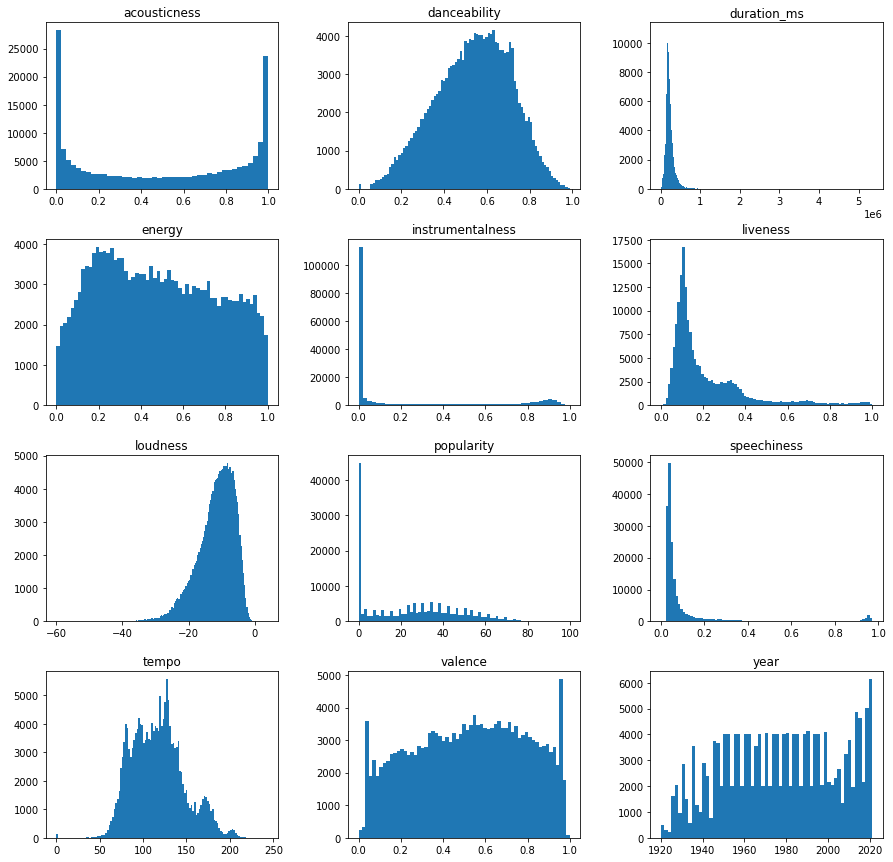

In [44]:
main_data.hist(column=['acousticness', 'danceability','duration_ms','energy','instrumentalness',
                       'liveness','loudness','popularity','speechiness','tempo','valence',
                       'year'], figsize=(15,15), grid=False, bins="scott");

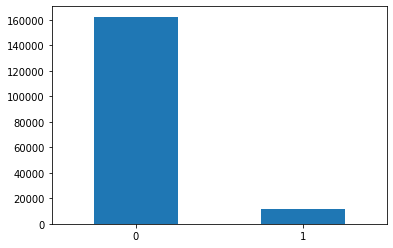

In [10]:
main_data['explicit'].value_counts()[range(2)].plot.bar(rot=0);

This shows whether the music is explicit or not.

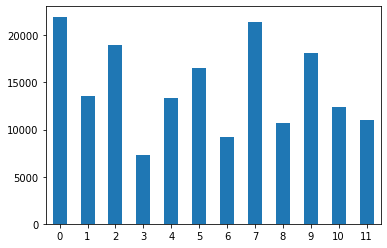

In [11]:
main_data['key'].value_counts()[range(12)].plot.bar(rot=0);

These are musical keys of the piece, A,B,C etc. (do, re, mi...)

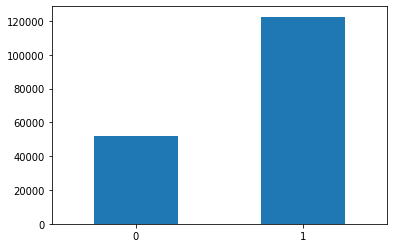

In [12]:
main_data['mode'].value_counts()[range(2)].plot.bar(rot=0);

This shows whether the key is minor or major.

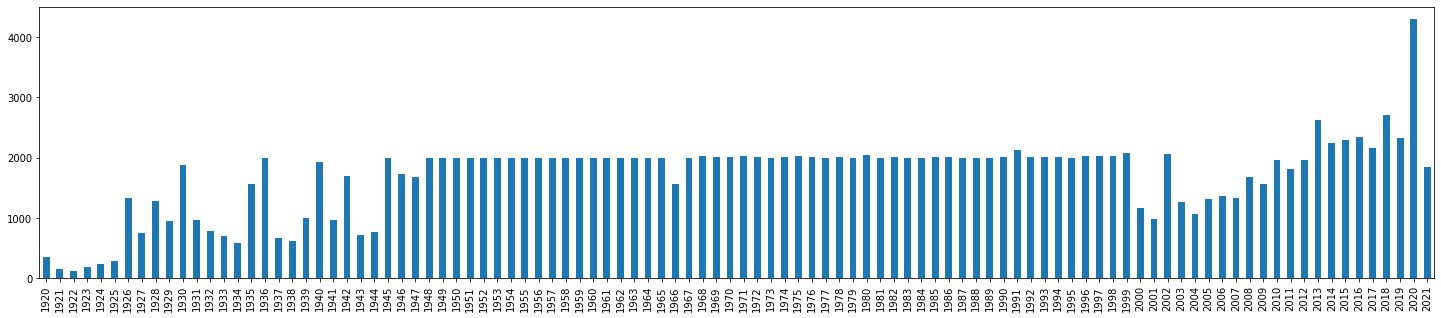

In [13]:
main_data['year'].value_counts()[range(1920,2022)].plot.bar(figsize=(25,5));

Release years of the musics. Maybe this was better in a histogram :)

In [14]:
main_data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


### Correlations

Let's see the correlations of each numerical feature.

In [15]:
main_data_corr = main_data.corr()
main_data_corr

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.263217,-0.089169,-0.750852,-0.208176,0.221956,-0.028028,-0.029654,-0.546639,0.064633,-0.396744,-0.022437,-0.223840,-0.166968,-0.607515
danceability,-0.263217,1.000000,-0.100757,0.204838,0.200842,-0.215589,0.026266,-0.110033,0.249541,-0.048358,0.123746,0.239962,0.005479,0.536713,0.159095
duration_ms,-0.089169,-0.100757,1.000000,0.060516,-0.033808,0.103621,0.002020,0.028942,0.019791,-0.046849,0.024717,-0.097838,-0.008182,-0.183199,0.105661
energy,-0.750852,0.204838,0.060516,1.000000,0.102561,-0.177750,0.035780,0.134815,0.779267,-0.056160,0.328939,-0.112616,0.266448,0.326418,0.540850
explicit,-0.208176,0.200842,-0.033808,0.102561,1.000000,-0.130609,0.005282,0.037288,0.106249,-0.062503,0.152545,0.353872,0.008075,-0.009275,0.151619
instrumentalness,0.221956,-0.215589,0.103621,-0.177750,-0.130609,1.000000,-0.004619,-0.047941,-0.317562,-0.056731,-0.300625,-0.133966,-0.068656,-0.219188,-0.114259
key,-0.028028,0.026266,0.002020,0.035780,0.005282,-0.004619,1.000000,-0.003368,0.025227,-0.127397,0.001951,0.009648,0.005009,0.025592,0.019194
liveness,-0.029654,-0.110033,0.028942,0.134815,0.037288,-0.047941,-0.003368,1.000000,0.062695,0.001677,-0.078959,0.122034,0.008586,-0.005781,-0.011852
loudness,-0.546639,0.249541,0.019791,0.779267,0.106249,-0.317562,0.025227,0.062695,1.000000,-0.019250,0.337194,-0.213504,0.217914,0.302520,0.465189
mode,0.064633,-0.048358,-0.046849,-0.056160,-0.062503,-0.056731,-0.127397,0.001677,-0.019250,1.000000,0.007652,-0.040711,0.002438,0.021592,-0.048922


And let's see them in a heatmap:

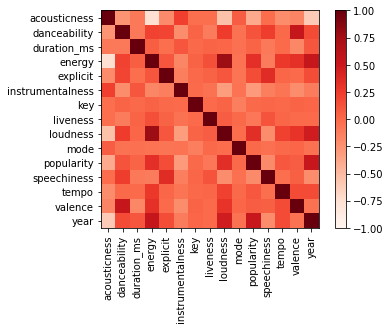

In [52]:
plt.imshow(main_data_corr, cmap="Reds", vmin=-1, vmax=1)
fig = plt.colorbar()
plt.xticks(range(len(main_data_corr)),main_data_corr.columns, rotation=90)
plt.yticks(range(len(main_data_corr)),main_data_corr.index)
plt.show()

Some correlations that catches the eye:
> 'energy' is highly negatively correlated with 'acousticness'

> 'loudness' is highly positively correlated with 'energy'

> 'danceability' is positively correlated with 'valence'   

> 'year' is positively correlated with 'popularity'

### Aggregated Visuals

In [54]:
data_by_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In this part, I will investigate 10 most popular genres and their features.

In [18]:
def plot_by_feature(feature):
    genre_list = []
    feature_list = []
    for genre in (data_by_genres['popularity'].sort_values()[-10:].index):
        genre_list.append(data_by_genres.iloc[genre]['genres'])
        feature_list.append(data_by_genres.iloc[genre][feature])
    plt.barh(range(len(feature_list)), feature_list, align='center')
    plt.yticks(range(len(feature_list)), genre_list);

This function plots a bar chart with the given feature. Let's use it with some of the features.

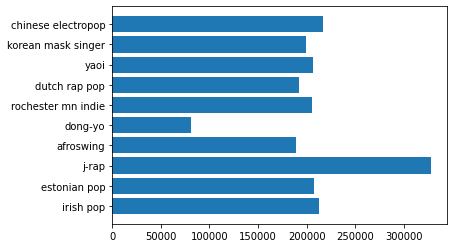

In [19]:
plot_by_feature('duration_ms')

Dong-yo songs are usually shorter whereas j-rap songs are usually longer.

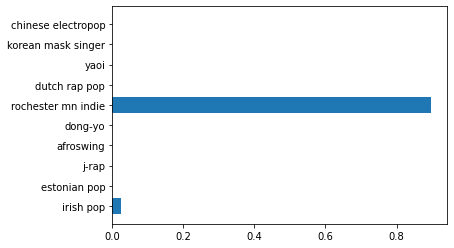

In [20]:
plot_by_feature('instrumentalness')

Interestingly, only rochester mn indie and irish pop has instrumentalness. This might be due to the lack of data in the dataset.

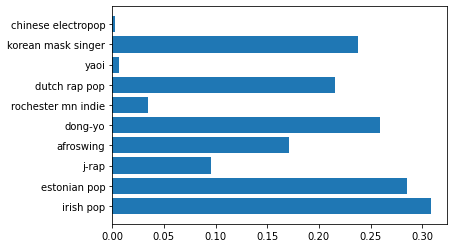

In [21]:
plot_by_feature('acousticness')

Here, the chinese electropop has a very low acousticness (almost 0), which is pretty obvious since it is an electronic music and acousticness is not related to it. However, I've never heard about yaoi music so I cannot comment on it.

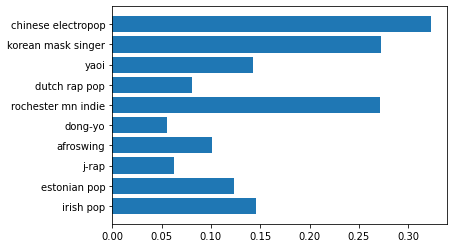

In [22]:
plot_by_feature('liveness')

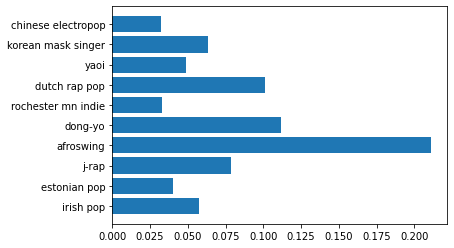

In [23]:
plot_by_feature('speechiness')

## Analysis of most popular artists and songs

Let's go back to our main dataset to identify most popular songs:

In [24]:
main_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Let's sort it with respect to popularity and take 5 most popular songs.

In [25]:
most_pop_songs = main_data.sort_values(by=['popularity'], ascending=False).head()
most_pop_songs

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.721,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021
19862,0.221,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020
19866,0.468,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020
19886,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020
19976,0.212,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020


I will compare the means of most popular songs and the general means of the main dataset:

In [26]:
means = most_pop_songs.mean()
main_means = main_data.describe().loc['mean']
mean_comparison_df = pd.DataFrame({'Means of Most Pop Songs':means, 'Means of Main Dataset':main_means})

mean_comparison_df

,Means of Most Pop Songs,Means of Main Dataset
acousticness,0.404600,0.499228
danceability,0.723200,0.536758
duration_ms,187780.400000,232810.032026
energy,0.639800,0.482721
explicit,1.000000,0.068135
instrumentalness,0.000112,0.197252
key,4.400000,5.205305
liveness,0.137220,0.211123
loudness,-6.261400,-11.750865
mode,0.400000,0.702384


Here we can conclude important things:
>1) Danceability is significantly higher in popular songs.

>2) Duration is significantly lower in popular songs, which generally means people love shorter songs.

>3) Energy is higher in popular songs.

>4) Explicitness is by far the most significant different one. Popular songs 100% explicit whereas other songs are 6% explicit.

>5) Instrumentalness is lower in popular songs.

>6) Tempo is higher in popular songs.

>7) Year is very interesting, the most popular songs are released in either 2020 or 2021 whereas the other songs' mean is 1977, which means most popular songs are the newest ones.

Let's investigate popularity by artists by doing the same procedure.

In [27]:
pop_artists = data_by_artist.sort_values(by=['popularity'], ascending=False).head()
pop_artists

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
4212,CJ,0.1900,0.711,123429.0,0.598,0.000000,0.1500,-7.621,0.1820,140.175,0.737,94.0,3,0,2
3767,Boza,0.3620,0.725,186133.0,0.756,0.000685,0.1030,-5.013,0.0572,100.070,0.828,92.0,4,1,2
13963,Joel Corry,0.1680,0.734,166028.0,0.874,0.000011,0.0489,-3.158,0.0662,122.953,0.905,91.0,8,1,1
14688,Juhn,0.1220,0.713,232853.0,0.617,0.000000,0.0962,-4.637,0.0887,168.021,0.682,91.0,8,1,2
23922,Ritt Momney,0.0563,0.399,210463.0,0.491,0.000890,0.1100,-10.778,0.0538,91.066,0.151,89.0,6,0,2


In [28]:
means = pop_artists.mean()
artists_mean_comp = pd.DataFrame({'Means of popular artists':means, 'Means of main dataset':main_means})
artists_mean_comp

,Means of popular artists,Means of main dataset
acousticness,0.179660,0.499228
count,1.800000,NaN
danceability,0.656400,0.536758
duration_ms,183781.200000,232810.032026
energy,0.667200,0.482721
explicit,NaN,0.068135
instrumentalness,0.000317,0.197252
key,5.800000,5.205305
liveness,0.101620,0.211123
loudness,-6.241400,-11.750865


Of course, we have some NaN values, for example because an artist cannot have a year feature. Let's remove those rows:

In [29]:
artists_mean_comp.dropna()

,Means of popular artists,Means of main dataset
acousticness,0.179660,0.499228
danceability,0.656400,0.536758
duration_ms,183781.200000,232810.032026
energy,0.667200,0.482721
instrumentalness,0.000317,0.197252
key,5.800000,5.205305
liveness,0.101620,0.211123
loudness,-6.241400,-11.750865
mode,0.600000,0.702384
popularity,91.400000,25.693381


Here, we can conclude some things:
>1) Popular artists tend to be less acoustic

>2) Popular artists tend to have shorter songs

>3) Popular artists tend to be more energetic

>4) Popular artists tend to be less instrumental

>5) Popular artists tend to be louder

### Conclusion

In the next part, which is Statistical Analysis and Hypothesis Testing, I will be implementing statistical tests on features to see the contribution of them on popularity of songs and decide on the Hypothesis.

# Statistical Analysis and Hypothesis Testing

Let's remember the correlation values for popularity to choose a feature to look into:

In [30]:
main_data_corr["popularity"]

acousticness       -0.396744
danceability        0.123746
duration_ms         0.024717
energy              0.328939
explicit            0.152545
instrumentalness   -0.300625
key                 0.001951
liveness           -0.078959
loudness            0.337194
mode                0.007652
popularity          1.000000
speechiness        -0.195329
tempo               0.094985
valence             0.063471
year                0.513227
Name: popularity, dtype: float64

I will investigate the relationship between acousticness and popularity. First, some information about them:

In [31]:
main_data["acousticness"].mean()

0.49922848176599444

In [32]:
main_data["acousticness"].std()

0.379935841873728

I will take a sample of popular songs. n should be n>30 and n<10% so I will take n=100 most popular songs.

In [33]:
most_100_pop_songs = main_data.sort_values(by=['popularity'], ascending=False).iloc[0:100]
most_100_pop_songs.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.721,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021
19862,0.221,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020
19866,0.468,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020
19886,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020
19976,0.212,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020


In [34]:
most_100_pop_songs["acousticness"].mean()

0.26586389999999993

In [35]:
most_100_pop_songs["acousticness"].std()

0.24533774734128247

As you can see the mean of acousticness is lower in popular songs compared to the mean of acousticness in all songs. Let's form our hypothesis:

Null Hypothesis ($H_0$): Acousticness is the same in popular songs.

$H_0: \mu_{popular} = \mu = 0.4992$

Alternate Hypothesis ($H_A$): Acousticness is significantly lower in popular songs.

$H_A: \mu_{popular} < \mu = 0.4992$ 

Significance level: 0.05

$SE = \frac{\sigma}{\sqrt n} = \frac{0.2453}{10} = 0.0245$

$z = \frac{\mu_a - \mu}{SE} = \frac{0.2659 - 0.4992}{0.3799} = -0.6141$

From the Z-Table, our p-value is 0.27093



### Conclusion:

Since p-value is not less than 0.05, we can not reject null hypothesis $H_0$. Hence, acousticness effect on popularity is statistically **insignificant**.

# Machine Learning

Before starting to machine learning part, I need to prepare the dataset. First, I will remove 'artists', 'id', 'name' and 'release_date' features because they are not numerical so we cannot directly use them in our models (I will be using 'year' feature instead of 'release_date' and neglecting the effect of months and days). Then, I will split the dataset into 60% training, 20% testing and 20% validation.

In [36]:
dataset_for_ML = main_data.drop(['artists', 'id', 'name', 'release_date'], axis=1)
dataset_for_ML

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,147615,0.866,0,0.000060,6,0.1780,-5.089,0,0,0.0356,125.972,0.1860,2020
174385,0.795000,0.429,144720,0.211,0,0.000000,4,0.1960,-11.665,1,0,0.0360,94.710,0.2280,2021
174386,0.806000,0.671,218147,0.589,0,0.920000,4,0.1130,-12.393,0,0,0.0282,108.058,0.7140,2020
174387,0.920000,0.462,244000,0.240,1,0.000000,0,0.1130,-12.077,1,69,0.0377,171.319,0.3200,2021


In [37]:
# installing and importing related sklearn modules

!pip install sklearn
from sklearn.model_selection import train_test_split

You should consider upgrading via the 'c:\users\taner\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Since 174k rows take too much to train the models, I will take a sample of 500.

In [38]:
sampled_ds = dataset_for_ML.sample(n=1000, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(sampled_ds.drop(['popularity'], axis=1), sampled_ds['popularity'],
                                                    test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# check if it is indeed 60% training set
print(round(len(X_train)/len(sampled_ds), 2) == 0.6)

True


I will be comparing Random Forest Regressor, AdaBoost Regressor and Decision Tree Regressor for the prediction of song popularity. Since I am using regressors, I will investigate $R^2$ score, $mean$ $absolute$ $error$ $(MAE)$ and $mean$ $squared$ $error$ $(MSE)$ instead of accuracy, precision and recall.

Let's train our models with 100 estimators:

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
model_RF.fit(X_train, Y_train)

model_ADA = AdaBoostRegressor(n_estimators=100, random_state=42)
model_ADA.fit(X_train, Y_train)

model_DT = DecisionTreeRegressor(random_state=42)
model_DT.fit(X_train, Y_train);

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RF_pred = model_RF.predict(X_test)
RF_r2_score = r2_score(Y_test, RF_pred)
RF_MAE_score = mean_absolute_error(Y_test, RF_pred)
RF_MSE_score = mean_squared_error(Y_test, RF_pred)
print(f"--- Random Forest Regressor ---\n\tR^2 score = {RF_r2_score}\
        \n\tMAE score = {RF_MAE_score}\n\tMSE score = {RF_MSE_score}\n")

ADA_pred = model_ADA.predict(X_test)
ADA_r2_score = r2_score(Y_test, ADA_pred)
ADA_MAE_score = mean_absolute_error(Y_test, ADA_pred)
ADA_MSE_score = mean_squared_error(Y_test, ADA_pred)
print(f"--- AdaBoost Regressor ---\n\tR^2 score = {ADA_r2_score}\
        \n\tMAE score = {ADA_MAE_score}\n\tMSE score = {ADA_MSE_score}\n")

DT_pred = model_DT.predict(X_test)
DT_r2_score = r2_score(Y_test, DT_pred)
DT_MAE_score = mean_absolute_error(Y_test, DT_pred)
DT_MSE_score = mean_squared_error(Y_test, DT_pred)
print(f"--- Decision Tree Regressor ---\n\tR^2 score = {DT_r2_score}\
        \n\tMAE score = {DT_MAE_score}\n\tMSE score = {DT_MSE_score}\n")

--- Random Forest Regressor ---
	R^2 score = 0.5036415193916361        
	MAE score = 10.9706
	MSE score = 253.748581

--- AdaBoost Regressor ---
	R^2 score = 0.4714973072118612        
	MAE score = 11.922340090649657
	MSE score = 270.1813580082294

--- Decision Tree Regressor ---
	R^2 score = -0.09563311636233629        
	MAE score = 14.83
	MSE score = 560.11



Higher the $R^2$ score is, the better the model is. Less error ($MAE$ $/$ $MSE$) means the model is better. It looks like Random Forest is the best for this dataset and Decision Tree is the worst. However, I chose the parameters arbitrarily. So let's see if I can improve the results of Random Forest Regressor with the help of hyperparameter tuning using GridSearchCV.

In [41]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth':[None, 2, 5],
                 'n_estimators':[50, 100, 250, 500]}

rfr = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rfr, param_grid=parameter_grid, return_train_score=True)
grid_search.fit(X_val, Y_val)
print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 250}


Let's see if these parameters makes our model better:

In [42]:
print(f"--- Old Random Forest Regressor ---\n\tR^2 score = {RF_r2_score}\
        \n\tMAE score = {RF_MAE_score}\n\tMSE score = {RF_MSE_score}\n")

RF_after_tuning = RandomForestRegressor(n_estimators=250, max_depth=5, random_state=42)
RF_after_tuning.fit(X_train, Y_train)
RF_pred_after_tuning = RF_after_tuning.predict(X_test)
RF_r2_score_at = r2_score(Y_test, RF_pred_after_tuning)
RF_MAE_score_at = mean_absolute_error(Y_test, RF_pred_after_tuning)
RF_MSE_score_at = mean_squared_error(Y_test, RF_pred_after_tuning)
print(f"--- Random Forest Regressor After Tuning ---\n\tR^2 score = {RF_r2_score_at}\
        \n\tMAE score = {RF_MAE_score_at}\n\tMSE score = {RF_MSE_score_at}\n")

--- Old Random Forest Regressor ---
	R^2 score = 0.5036415193916361        
	MAE score = 10.9706
	MSE score = 253.748581

--- Random Forest Regressor After Tuning ---
	R^2 score = 0.5013768180052355        
	MAE score = 10.923603590445698
	MSE score = 254.90634254863627



Tuning hyper parameters increased our main score, $R^2$ by 5 percent. Although errors are slightly increased, we might say it is now a better model.

Here is the graph for which features contribute to the popularity the most:

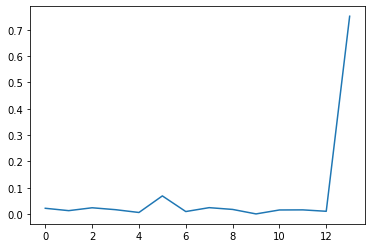

In [43]:
plt.plot(RF_after_tuning.feature_importances_)
plt.show()